In [1]:
%cd ..

/mnt/c/Users/maxli/OneDrive - Van Oord/Documents/thesis/code


In [2]:
import geopandas as gpd
from atl_module.geospatial_utils.raster_interaction import query_from_lines
import matplotlib.pyplot as plt
import numpy as np

In [19]:
transect_number = 6

In [20]:
tracklines = gpd.read_file('../data/test_sites/florida_keys/tracklines/')
trackline_test = tracklines.geometry[transect_number]
kriging_points = gpd.read_file('../data/test_sites/florida_keys/kriging_pts/')
utm_line = tracklines.to_crs(kriging_points.crs).geometry[transect_number]
clipped_kriging_points = kriging_points.clip(utm_line.buffer(50)).to_crs('EPSG:4326')
clipped_kriging_points

,Y,X,Z,geometry


In [21]:
x,y,truth_values = query_from_lines(trackline_test,'../data/test_sites/florida_keys/in-situ-DEM/truth.vrt',band=1)
x,y,bilinear_gebco = query_from_lines(trackline_test,'../data/test_sites/florida_keys/bilinear.tif',band=1)
x,y,kalman = query_from_lines(trackline_test,'../data/test_sites/florida_keys/kalman_updated.tif',band=1)
x,y,kalman_uncertainty = query_from_lines(trackline_test,'../data/test_sites/florida_keys/kalman_updated.tif',band=2)
x,y,kriging = query_from_lines(trackline_test,'../data/test_sites/florida_keys/kriging_output.tif',band=1)
x,y,kriging_uncertainty = query_from_lines(trackline_test,'../data/test_sites/florida_keys/kriging_output.tif',band=2)


In [22]:
xindex = np.arange(0,len(kalman))

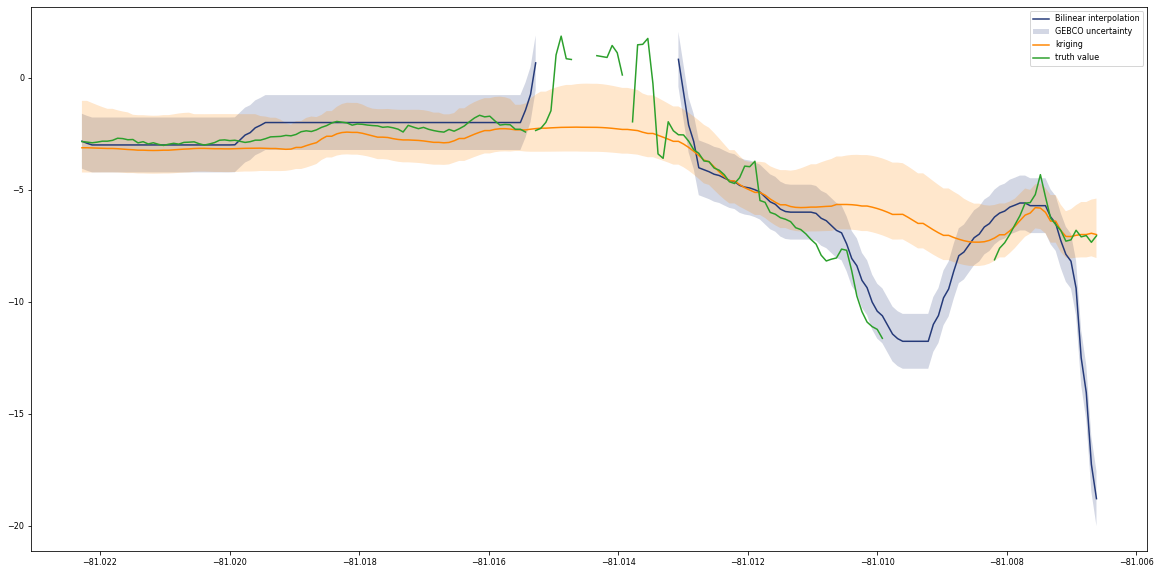

In [26]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(x,bilinear_gebco,label='Bilinear interpolation')
ax.fill_between(x,bilinear_gebco+np.sqrt(1.5),bilinear_gebco-np.sqrt(1.5),alpha=0.2,label='GEBCO uncertainty')
ax.plot(x,kriging,label='kriging')
ax.fill_between(x,kriging + np.sqrt(kriging_uncertainty),kriging - np.sqrt(kalman_uncertainty),alpha=0.2)
# ax.ca
ax.scatter(clipped_kriging_points.geometry.x,clipped_kriging_points.Z)
ax.plot(x,truth_values,label='truth value')
ax.legend()

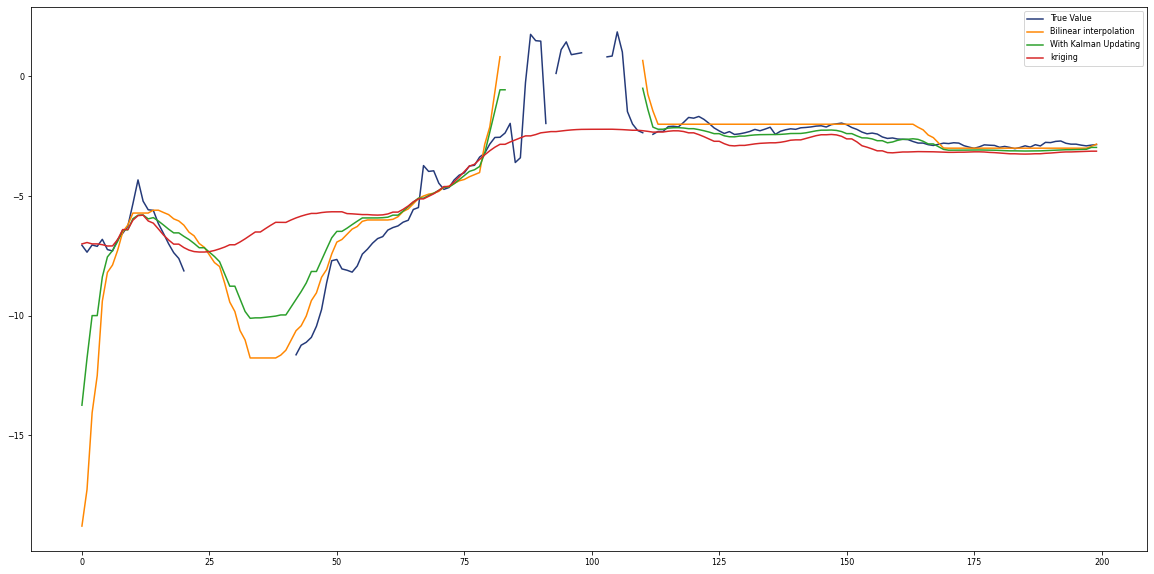

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(truth_values,label='True Value')
ax.plot(bilinear_gebco,label='Bilinear interpolation')
ax.plot(kalman,label='With Kalman Updating')
ax.plot(kriging,label='kriging')
ax.legend()